---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Applied Machine Learning: Module 4 (Supervised Learning, Part II)

## Preamble and Datasets

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.


<IPython.core.display.Javascript object>


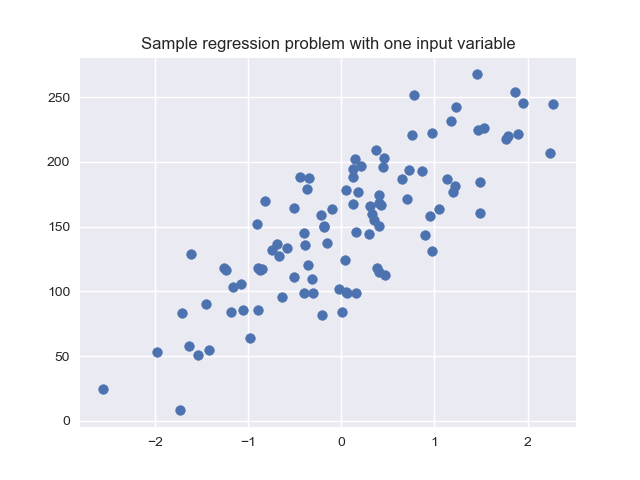

<IPython.core.display.Javascript object>


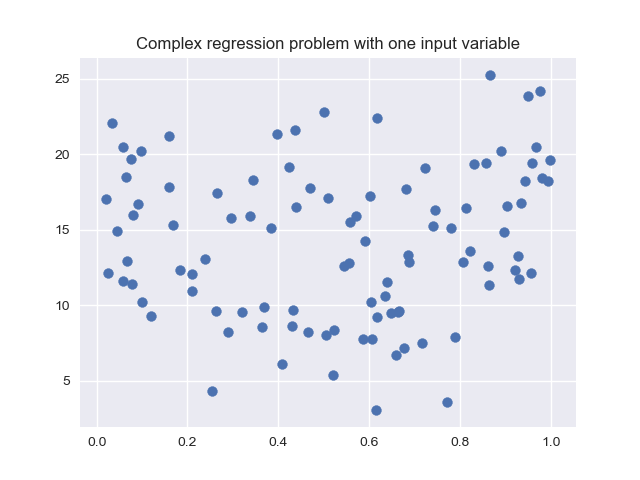

<IPython.core.display.Javascript object>


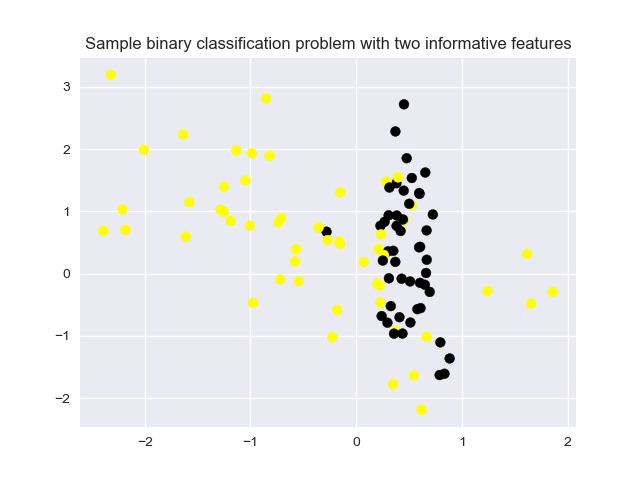

<IPython.core.display.Javascript object>


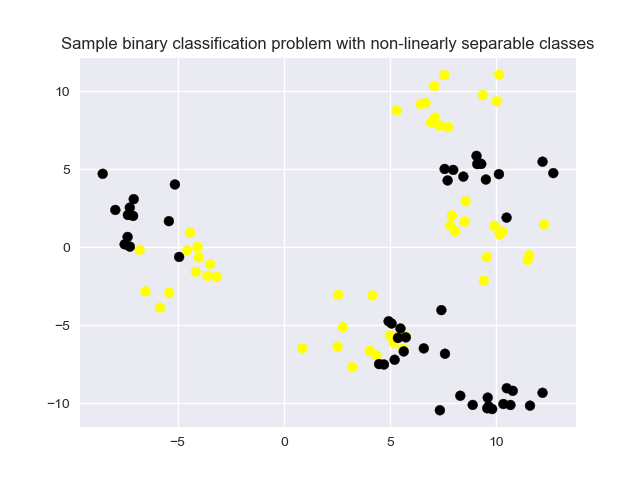

C:\Users\D17911\Downloads\Applied Data Science with Python Specialization\Applied Machine Learning in Python\adspy_shared_utilities.py:19: FutureWarning: read_table is deprecated, use read_csv instead.
  crime = pd.read_table('CommViolPredUnnormalizedData.txt', sep=',', na_values='?')


In [3]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset


cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# fruits dataset
fruits = pd.read_table('fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7,
                           random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

# synthetic dataset for classification (binary)
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], marker= 'o',
           c=y_C2, s=50, cmap=cmap_bold)
plt.show()

# more difficult synthetic dataset for classification (binary)
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

## Naive Bayes classifiers: a simple, probabilistic classifier family
Naive Bayes Classifiers are based on simple probabilistic models of how the data in each class might have been generated.
#### These classifiers are called 'Naive' because they assume that features are conditionally independent, given the class.
#### In other words: they assume that, for all instances of a given class, the features have little/no correlation with each other.
#### Highly efficient learning and prediction. (simple and fast)
#### But generalization performance may worse than more sophisticated learning models.
#### Can be competitive for some tasks. (high dimensional data sets)

Note:

    Guassian Naive Bayes is used often in high dimensional data, with hundreds/thousands features.
    Bernoulli and Multinomial Naive Bayes used for text classification, and have very sparse feature space.

### Naive Bayes Classifier Types
#### Bernoulli: binary features (e.g. word presence / absence, this does not take into account how often the word occurs in the text).
#### Multinomial: discrete features (e.g. word counts, number of times word appear in the text document)
#### Guassian: continuous/real-valued features
---- Statistics computed for each class:
  
      For each feature: mean, standard deviation
      
      For prediction, the classifier compares the features of the example data point to be predicted with the feature statistics for each class, and selects the class that best matches the data point.
#### See the Applied Text Mining course for more details on the Bernoulli and Multinomial Naive Bayes Models.
Predicting the class of a new data point corresponds mathematically to estimating the probability that each class's Guassian Distribution was most likely to have generated the data point. Classifier then picks the class that has the highest probability.

<IPython.core.display.Javascript object>


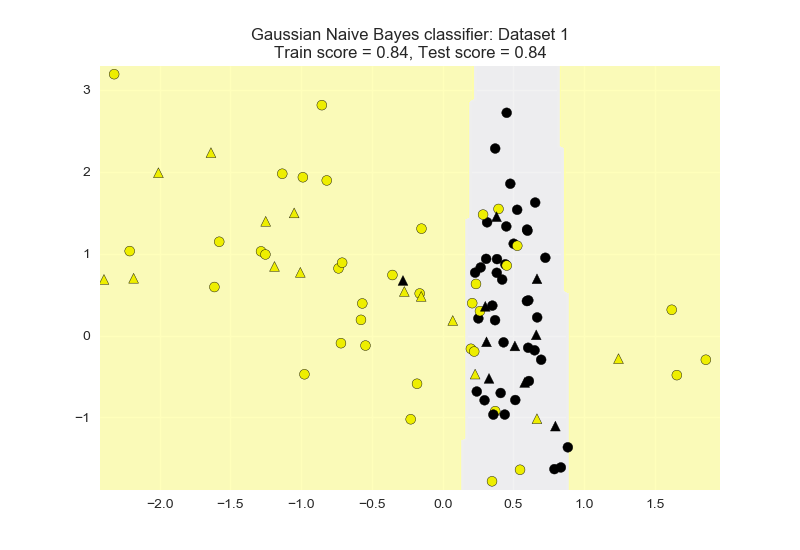

In [3]:
from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)
plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test,
                                 'Gaussian Naive Bayes classifier: Dataset 1')

Note:
    Naive Bayes Classifier in scikit learn that support partial fit method, 'fit' is used to train the classifier incrementally, 'partial fit' can work with huge datasets that doesn't fit into memory.

<IPython.core.display.Javascript object>


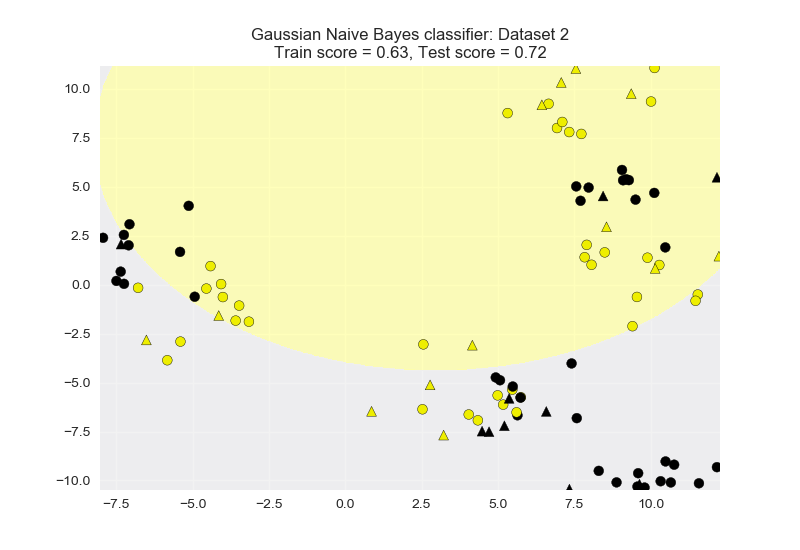

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                   random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)
plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test,
                                 'Gaussian Naive Bayes classifier: Dataset 2')
## When classes are no longer as easily separable(more difficult binary), Naive Bayes is not performed well.

### Application to a real-world dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

nbclf = GaussianNB().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of GaussianNB classifier on training set: {:.2f}'
     .format(nbclf.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'
     .format(nbclf.score(X_test, y_test)))
## In this example, Naive Bayes model are quite competitive comparing with SVM

Breast cancer dataset
Accuracy of GaussianNB classifier on training set: 0.95
Accuracy of GaussianNB classifier on test set: 0.94


### Naive Bayes Classifiers: Pros and Cons
### Pros:
---- 1. Easy to understand, simple, efficient parameter estimation.

---- 2. Works well with high-dimensional data.

---- 3. Often useful as a baseline comparison against more sophisticated methods.

### Cons:
---- 1. Assumption that features are conditionally independent given the class is not realistic.

---- 2. As a result, other classifier types often have better generalization performance.

---- 3. Their confidence estimates for prediction are not very accurate.

## Ensembles of Decision Trees
Creating learning models known as ensembles.

An ensemble takes multiple individual learning models and combines them to produce an aggregate model that is more powerful than any of its individual learning models alone.

The reason is that: different individual learning models have different kinds of mistakes on the data set(because each individual model might overfit to a different part of the data). Combining different individual models we can average out their individual mistakes to reduce the risk of overfitting while maintaining strong prediction performance.

### Random Forests
#### An ensemble of trees, not just one tree.
#### Widely used, very good results on many problems.
#### sklearn.ensemble module:
---- Classification: RandomForestClassifier

---- Regression: RandomForestRegressor
#### One decision tree --> Prone to overfitting.
#### Many decision trees --> More stable, better generalization  (10~100 trees)
#### Ensemble of trees should be diverse: introduce random variation into tree-building.

### How to introduce random variation into tree building:
--- 1. Randomized bootstrap copies. The data used to build each tree is selected randomly.

--- 2. Randomized feature splits. The features chosen in each split tests are also randomly selected.

Before using the random forest model, we need to decide how many trees to build, use n_estimator parameter.

#### Bootstrap Copies Method:
If training set has N instances in total, a bootstrap sample of size N is created by repeatedly picking one of the N dataset rows at random with replacement. Repeated this random selection process N times. (in one boostrap sample, some rows might appear several times, and some rows might missing).
#### Randomized decision trees:
When picking the best split for a node of a tree, instead of finding the best split across all possible features, a random subset of features is chosen, and best split is found within that smaller subset of features. The number of features selected in each stage is controlled by the max_features parameter.

### Random Forest max_features Parameter
The random forest model is quite sensitive to the max_features parameter.
#### Learning is quite sensitive to max_features.
#### Setting max_features = 1 leads to forests diverse, more complex trees.
#### Setting max_features = < close to number of features> will lead to similar forests with simpler trees.

### Prediction Using Random Forests
#### 1. Make a prediction for every tree in the forest.
#### 2. Combine individual predictions.
---- Regression: mean of individual tree predictions.

---- Classification:
     
     1. Each tree gives probability for each class.
     2.  Probabilities averaged across trees.
     3. Predict the class with highest probability.

### Random forests

<IPython.core.display.Javascript object>


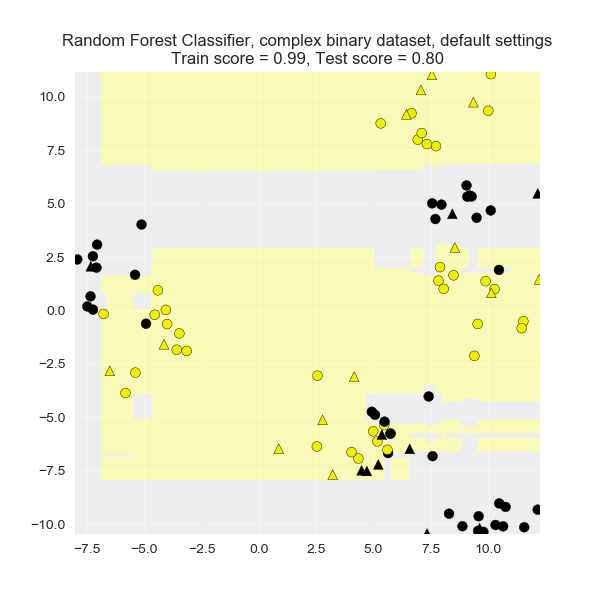

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                   random_state = 0)
fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))

clf = RandomForestClassifier().fit(X_train, y_train)
title = 'Random Forest Classifier, complex binary dataset, default settings'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,
                                         y_test, title, subaxes)

plt.show()

### Random forest: Fruit dataset

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


<IPython.core.display.Javascript object>


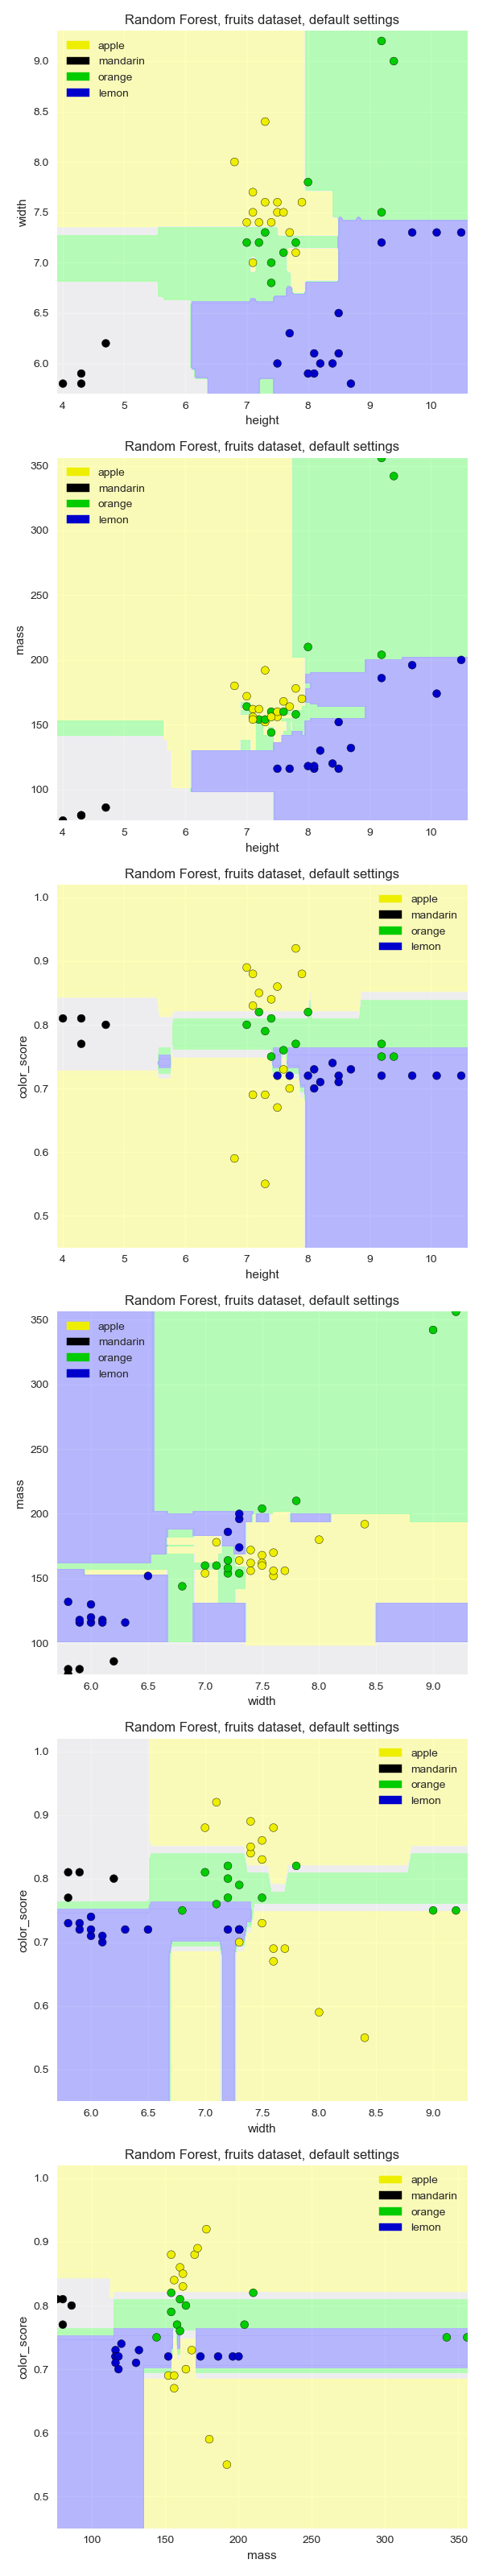

Random Forest, Fruit dataset, default settings
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.80


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_fruits.as_matrix(),
                                                   y_fruits.as_matrix(),
                                                   random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

title = 'Random Forest, fruits dataset, default settings'
pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = RandomForestClassifier().fit(X, y)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             target_names_fruits)
    
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
    
plt.tight_layout()
plt.show()

clf = RandomForestClassifier(n_estimators = 10,
                            random_state=0).fit(X_train, y_train)

print('Random Forest, Fruit dataset, default settings')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

#### Random Forests on a real-world dataset

In [8]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = RandomForestClassifier(max_features = 8, random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.99


##### Advantage of using Random Forests: We do not need to scaling the features (preprocessing)

### Random Forest: Pros and Cons
#### Pros:
---- Widely used, excellent prediction performance on many problems.

---- Does not require careful normalization of features or extensive parameter tuning.

---- Like decision trees, handles a mixture of feature types.

---- Easily parallelized across multiple CPUs.

#### Cons:
---- 1. The resulting models are often difficult for humans to interpret.

---- 2. Like decision trees, random forests may not be a good choice for very high-dimensional tasks(e.g. text classifiers) compared to fast accurate linear models.

## Random Forests: RandomForestClassifier Key Parameters
#### n_estimators: number of trees to use in ensemble (default: 10).
---- Should be larger for larger datasets to reduce overfitting (but uses more computation and memory).
#### max_features: has a strong effect on performance. Influences the diversity of trees in the forest.
---- Default works well in practice(classifier is the square root of # features, regression is the log2), but adjusting may lead to some further gains.
#### max_depth: controls the depth of each tree (default: None. Splits untill all leaves are pure).
#### n_jobs: How many cores to use in parallel during training. (run job on different cores).
#### Choose a fixed setting for the random_state parameter if you need reproducible results.

### Gradient-boosted decision trees

#### Gradient Booted Decision Trees is that build a series of trees, each tree is trained so that it attempts to correct the mistakes of the previous tree in the series.

#### Training builds a series of small decision trees. (shallow trees known as wek learners).
#### Each tree attempts to correct errors from the previous tage.
##### The learning rate controls how hard each new tree tries to correct remaining mistakes from previous round.
---- 1. High learning rate: more complex trees.

---- 2. Low learning rate, simpler trees.

<IPython.core.display.Javascript object>


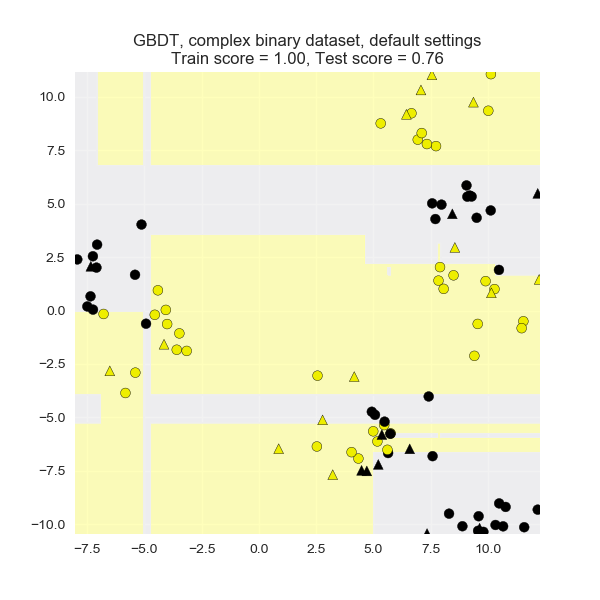

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))

clf = GradientBoostingClassifier().fit(X_train, y_train)   ## default learning_rate = 0.1, n_estimators=100, max_depth = 3
title = 'GBDT, complex binary dataset, default settings'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,
                                         y_test, title, subaxes)

plt.show()

#### Gradient boosted decision trees on the fruit dataset

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


<IPython.core.display.Javascript object>


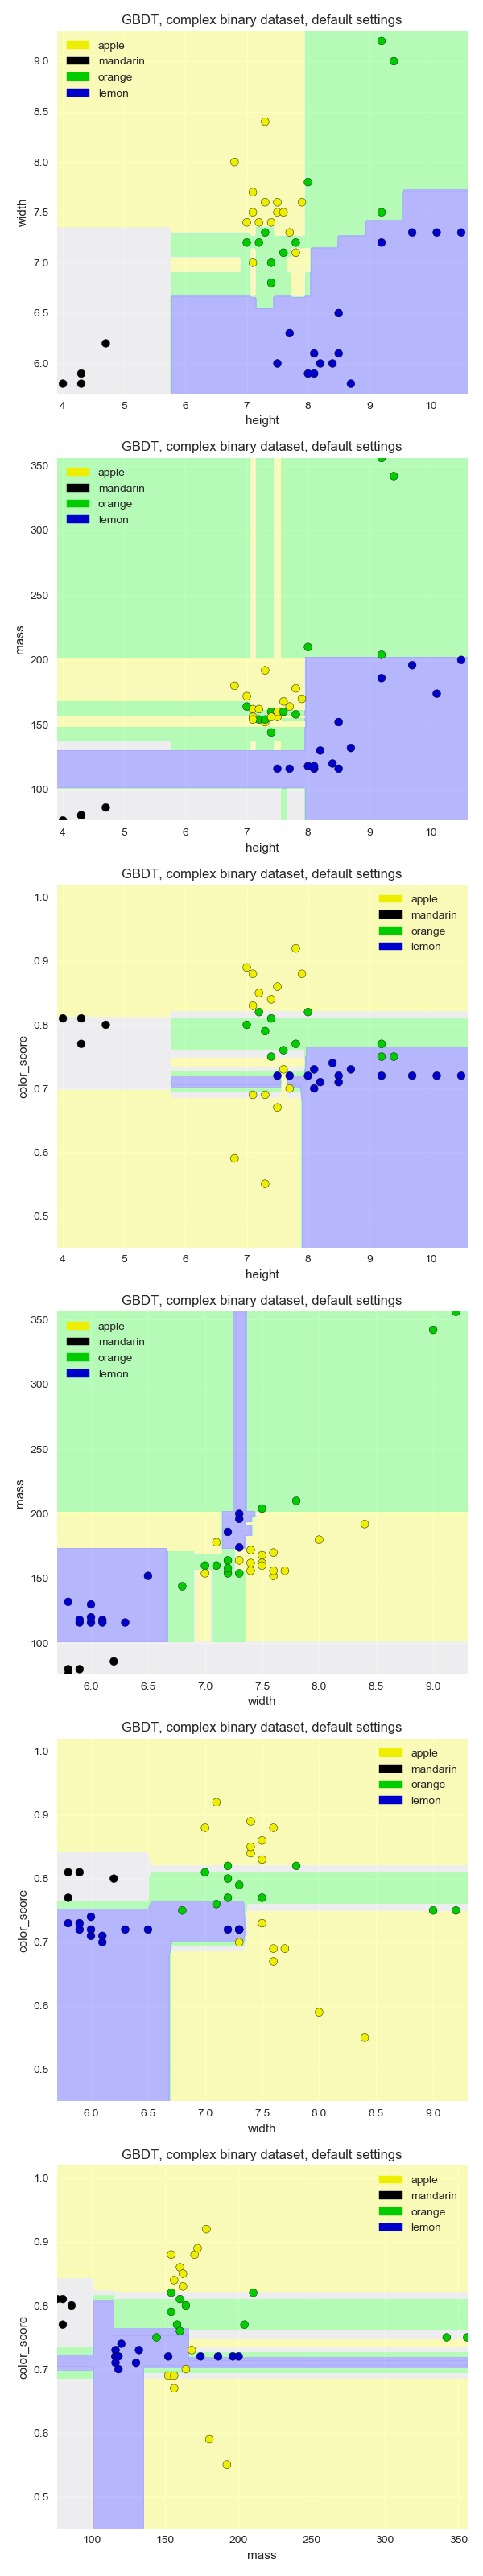

GBDT, Fruit dataset, default settings
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.80


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_fruits.as_matrix(),
                                                   y_fruits.as_matrix(),
                                                   random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = GradientBoostingClassifier().fit(X, y)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             target_names_fruits)
    
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
    
plt.tight_layout()
plt.show()
clf = GradientBoostingClassifier().fit(X_train, y_train)

print('GBDT, Fruit dataset, default settings')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

#### Gradient-boosted decision trees on a real-world dataset

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = GradientBoostingClassifier(random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset (learning_rate=0.1, max_depth=3)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(clf.score(X_test, y_test)))

clf = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 2, random_state = 0)
clf.fit(X_train, y_train)  ## max_depth controls the overfitting problem

print('Breast cancer dataset (learning_rate=0.01, max_depth=2)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset (learning_rate=0.1, max_depth=3)
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.96

Breast cancer dataset (learning_rate=0.01, max_depth=2)
Accuracy of GBDT classifier on training set: 0.97
Accuracy of GBDT classifier on test set: 0.97


### GBDT: Pros and Cons
#### Pros:
---- 1. Often best off-the-shelf accuracy on many problems.

---- 2. Using model for prediction requires only modest memory and is fast.

---- 3. Does not require careful normalization of features to perform well.

---- 4. Like decision trees, handles a mixture of feature types.
#### Cons:
---- 1. Like random forests, the models are often difficult for humans to interpret.

---- 2. Requires careful tuning of the learning rate and other parameters.

---- 3. Training can require significant computation.

---- 4. Like decision trees, not recommended for text classification and other problems with very high dimensional sparse features, for accuracy and computational cost reasons.

### GBDT: GradientBoostingClassifier 
#### Key Parameters (GBDT assumes each tree is a weak learner
#### n_estimators: sets # of small decision trees to use (weak learners) in the ensemble.
#### learning_rate: controls emphasis on fixing errors from previous iteration.
#### The above two are typically tuned together.
#### n_estimators is adjusted first, to best exploit memory and CPUs during training, then other parameter.
#### max_depth is typically set to a small value (e.g. 3-5) for most applications.

## Neural networks

#### Activation functions

In [ ]:
xrange = np.linspace(-2, 2, 200)

plt.figure(figsize=(7,6))

plt.plot(xrange, np.maximum(xrange, 0), label = 'relu')
plt.plot(xrange, np.tanh(xrange), label = 'tanh')
plt.plot(xrange, 1 / (1 + np.exp(-xrange)), label = 'logistic')
plt.legend()
plt.title('Neural network activation functions')
plt.xlabel('Input value (x)')
plt.ylabel('Activation function output')

plt.show()

### Neural networks: Classification

#### Multi-layer Perceptron with One Hidden Layer (MLPClassifier) 
(and tanh activation function)
#### MLP take the idea of computing weighted sums of the input features, by adding an additional processing step called a hidden layer.
#### Each hidden units in the hidden layer computes a nonlinear function of the weighted sums of the input features.
#### Then the MLP computes a weighted sum of these hidden unit outputs to form the final output value.

### Activation Function:
1. The hyperbolic tangent. (S-shaped function)

2. Rectified Linear Unit Function. -- default function for sklearn

3. Logistic function.

#### Synthetic dataset 1: single hidden layer

<IPython.core.display.Javascript object>


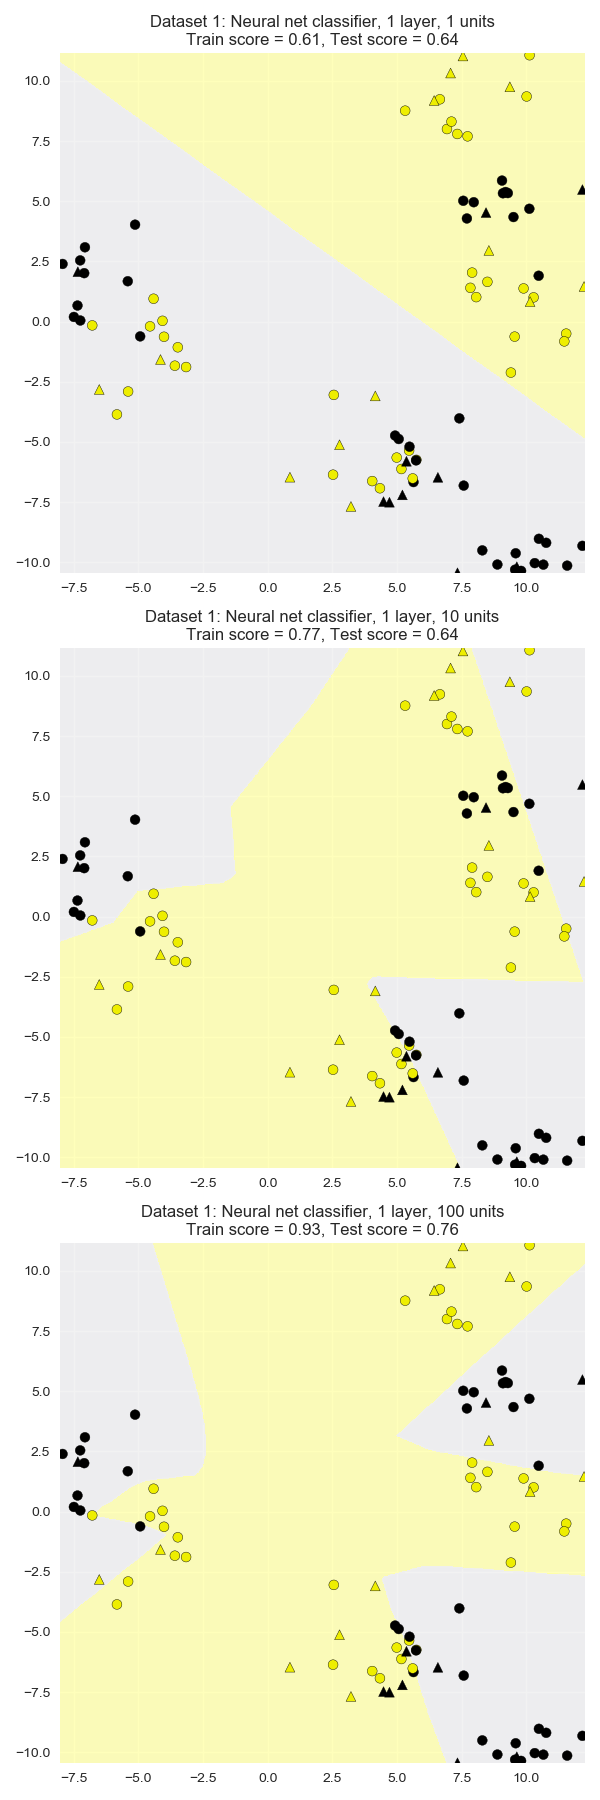

In [6]:
from sklearn.neural_network import MLPClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(3, 1, figsize=(6,18))

## hidden_layer_sizes parameter is a list, with one element for each hidden layer that gives the number of hidden units to use for that layer
## hidden_layer_sizes default is single hidden layer with 100 hidden units
## solver parameter which specifies the algorithms to use for learning the weights of the network
for units, axis in zip([1, 10, 100], subaxes):
    nnclf = MLPClassifier(hidden_layer_sizes = [units], solver='lbfgs',
                         random_state = 0).fit(X_train, y_train)

## Weights in neural network are assigned randomly
    title = 'Dataset 1: Neural net classifier, 1 layer, {} units'.format(units)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()
    
## The single hidden unit, the model is mathematically equivalent to logistic regression. (underfitting)


#### Synthetic dataset 1: two hidden layers

Adding the second hiddenlayer further increases the complexity of functions that the neural network can learn from more complex data sets.

<IPython.core.display.Javascript object>


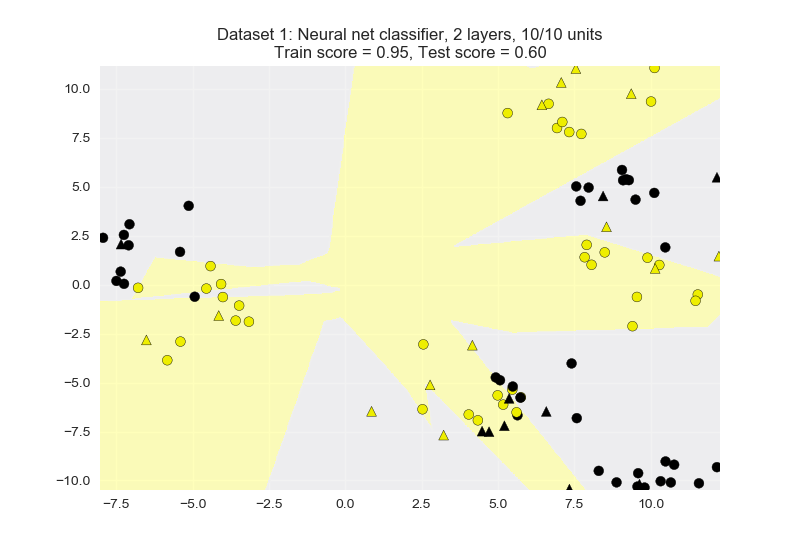

In [14]:
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

nnclf = MLPClassifier(hidden_layer_sizes = [10, 10], solver='lbfgs',
                     random_state = 0).fit(X_train, y_train)

plot_class_regions_for_classifier(nnclf, X_train, y_train, X_test, y_test,
                                 'Dataset 1: Neural net classifier, 2 layers, 10/10 units')

#### Regularization parameter: alpha
Control the model complexity, by adding an L2 regularization penalty on the weights, neural network prefer models with more weights shrunk close to zero

<IPython.core.display.Javascript object>


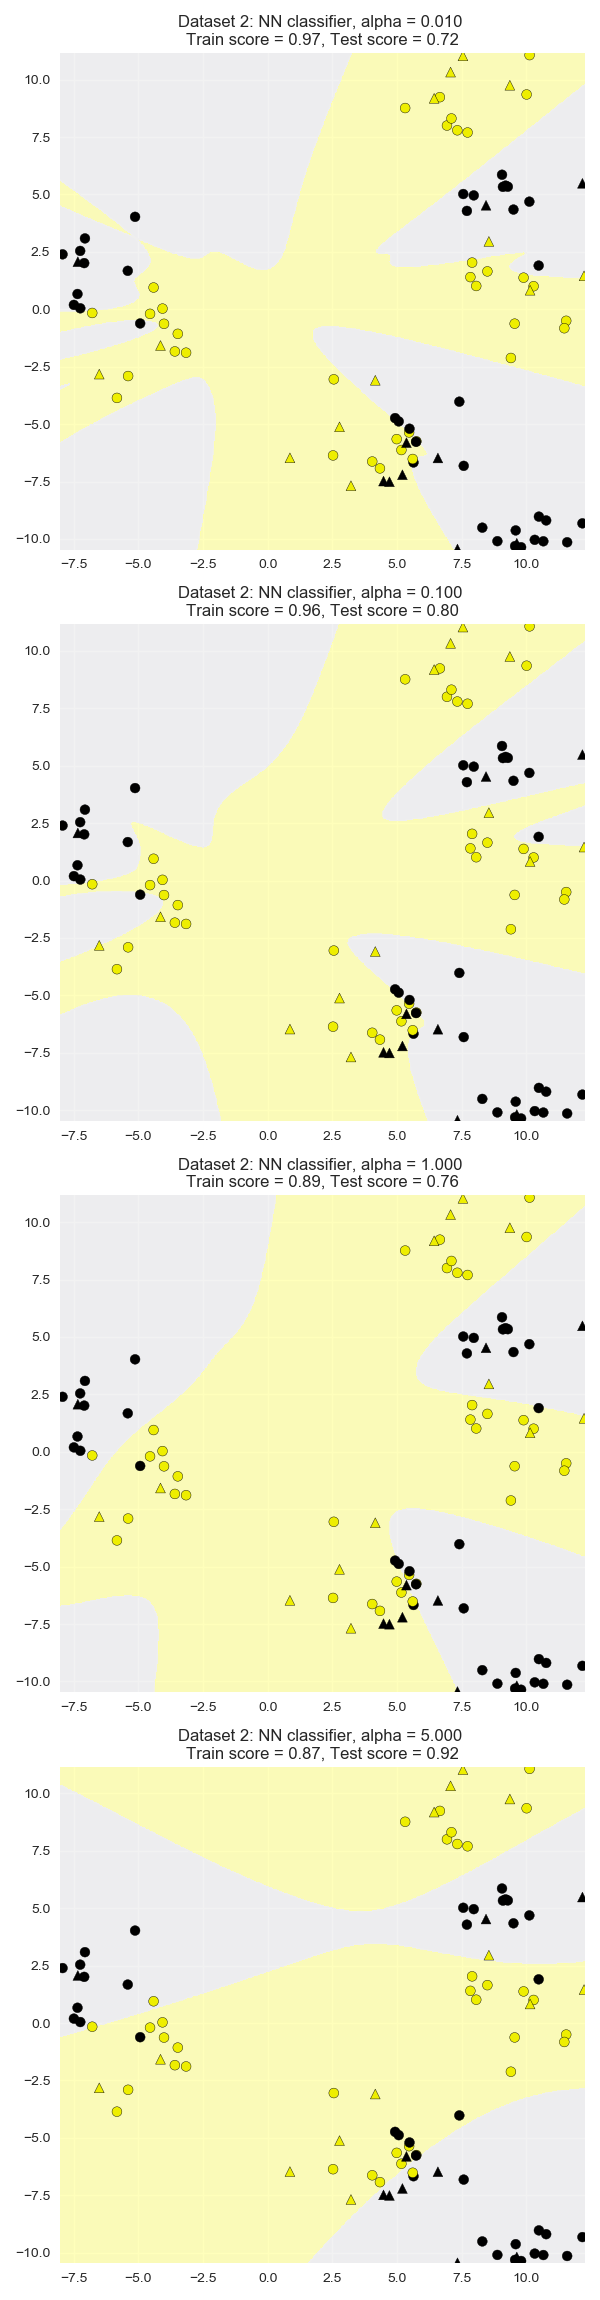

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(4, 1, figsize=(6, 23))

for this_alpha, axis in zip([0.01, 0.1, 1.0, 5.0], subaxes):
    nnclf = MLPClassifier(solver='lbfgs', activation = 'tanh',  ## hyperbolic tangent function
                         alpha = this_alpha,
                         hidden_layer_sizes = [100, 100],
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 2: NN classifier, alpha = {:.3f} '.format(this_alpha)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()
    

#### The effect of different choices of activation function

<IPython.core.display.Javascript object>


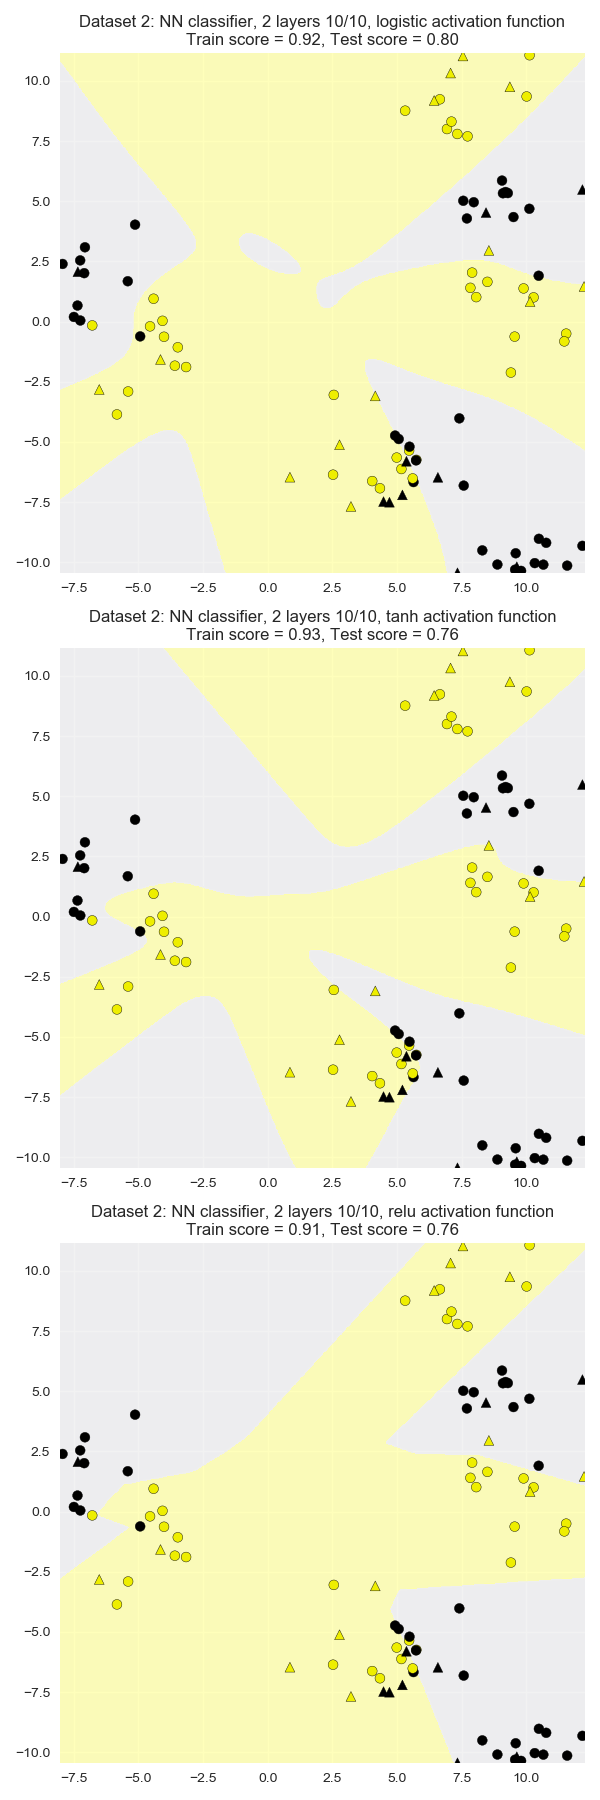

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(3, 1, figsize=(6,18))

for this_activation, axis in zip(['logistic', 'tanh', 'relu'], subaxes):
    nnclf = MLPClassifier(solver='lbfgs', activation = this_activation,
                         alpha = 0.1, hidden_layer_sizes = [10, 10],
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 2: NN classifier, 2 layers 10/10, {} \
activation function'.format(this_activation)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

### Neural networks: Regression

<IPython.core.display.Javascript object>


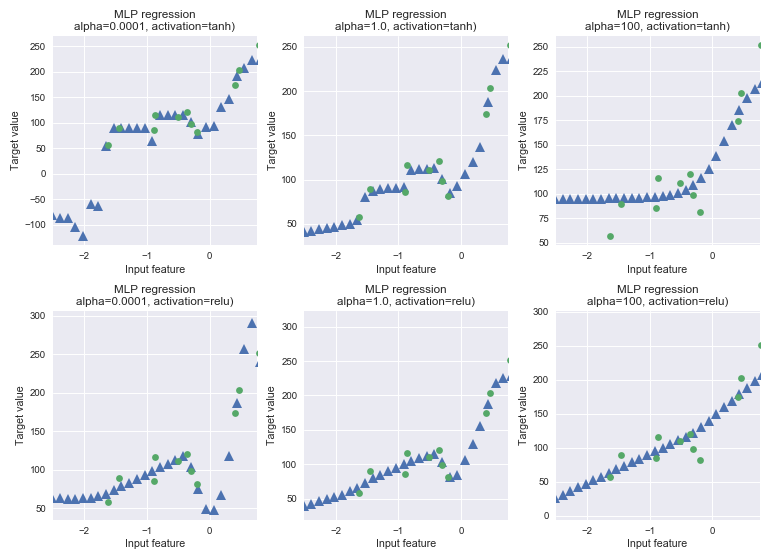

In [9]:
from sklearn.neural_network import MLPRegressor

fig, subaxes = plt.subplots(2, 3, figsize=(11,8), dpi=70)

X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

for thisaxisrow, thisactivation in zip(subaxes, ['tanh', 'relu']):
    for thisalpha, thisaxis in zip([0.0001, 1.0, 100], thisaxisrow):
        mlpreg = MLPRegressor(hidden_layer_sizes = [100,100],
                             activation = thisactivation,
                             alpha = thisalpha,
                             solver = 'lbfgs').fit(X_train, y_train)
        y_predict_output = mlpreg.predict(X_predict_input)
        thisaxis.set_xlim([-2.5, 0.75])
        thisaxis.plot(X_predict_input, y_predict_output,
                     '^', markersize = 10)
        thisaxis.plot(X_train, y_train, 'o')
        thisaxis.set_xlabel('Input feature')
        thisaxis.set_ylabel('Target value')
        thisaxis.set_title('MLP regression\nalpha={}, activation={})'
                          .format(thisalpha, thisactivation))
        plt.tight_layout()

#### Application to real-world dataset for classification

As with other supervised learning models, like regularized regression and SVM, it is important when using neural networks to properly normalized the input features.

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = MLPClassifier(hidden_layer_sizes = [100, 100], alpha = 5.0,
                   random_state = 0, solver='lbfgs').fit(X_train_scaled, y_train)

print('Breast cancer dataset')
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Breast cancer dataset
Accuracy of NN classifier on training set: 0.98
Accuracy of NN classifier on test set: 0.97


### Neural Networks: Pros and Cons
#### Pros:
---- They form the basis of state-of-the-art models and can be formed into advanced architectures that effectively capture complex features given enough data and computation.

#### Cons:
---- 1. Larger, more complex models require significant training time, data, and customization.

---- 2. Careful preprocessing of the data is needed. (MinMaxScaler, normalization).

---- 3. A good choice when the features are of similar type (the pixels from the same image for example), but less so when features of very different types.

### Neural Nets: MLPClassifier and MLPRegressor Important Parameters
#### hidden_layer-sizes: sets the number of hidden layers (number of elements in list), and number of hidden units per layer (each list element). Default: (100, 100 hidden unit in just one hidden layer).
#### alpha: controls weight on the regularization penalty that shrinks weights to zero.(Ridge) Default: alpha = 0.0001
#### activation: controls the nonlinear  function used for the activation function, including: 'relu' (default), 'logistic', 'tanh'.
#### solver: specifying the algorithm that learns the network weights. 'adam' is default tends to be both efficient and effective on large datasets with thousands of training examples, 'lbfgs' works for small data sets faster and more effective.

In [1]:
!find . -maxdepth 1 -not -type d

./addresses.csv
./train.csv
./Module 2.ipynb
./Assignment 3.ipynb
./Module 4.ipynb
./Assignment 1.ipynb
./test.csv
./CommViolPredUnnormalizedData.txt
./adspy_shared_utilities.py
./Module 3.ipynb
./fraud_data.csv
./fruit_data_with_colors.txt
./Assignment 4.ipynb
./Assignment 2.ipynb
./mushrooms.csv
./Classifier Visualization.ipynb
./latlons.csv
./Module 1.ipynb


In [7]:
!ls readonly

addresses.csv  adspy_temp.dot  polynomialreg1.png  train.csv


In [8]:
!cp ./Module 2.ipynb readonly/Module 2.ipynb

cp: target ‘2.ipynb’ is not a directory


### Deep Learning
Finding the right features to use as input to a learning model (Feature Engineering)
#### Deep Learning architectures combine a sophisticated automatic feature extraction phase with a supervised learning phase.
#### The feature extraction phase uses a hierachy of multiple feature extraction layers.
#### Starting from primitive, low-leve features in the initial layer, each feature layer's output provides the input features to the next higher feature layer.
#### All features are used in the final supervised learning model.

### Pros and Cons of Deep Learning
#### Pros:
---- 1. Powerful: deep learning has achieved significant gains over other machine learning approaches on many difficult learning tasks, leading to state-of-the-art performance across many different domains.

---- 2. Does effective automatic feature extraction, reducing the need for guesswork and heuristics on this key problem.

---- 3. Current software provides flexible architectures that can be adapted for new domains fairly easily.

#### Cons:
---- 1. Can require huge amounts of training data.

---- 2. Can acquire huge amounts of computing power.

---- 3. Architectures can be complex and often must be highly tailored to a specific application.

---- 4. The resulting models may not be easily interpretable. (Difficult to know what features led a deep learning system to make a particular prediction)

### Deep Learning software for Python
#### Keras
#### Lasagne
#### TensorFlow
#### Theano
#### Libraries support high-performance computation via GPUs.

## Data Leakage

#### When the data you're using to train contains information about what you're trying to predict.
#### Introducing information about the target during training that would not legitimately be available during actual use.
#### Obvious Examples:
---- Including the label to be predicted as a feature.

---- Including test data with training data.
#### If your model performance is too good to be true, it probably is and likely due to 'giveaway' features.

### More Subtle Exmaples of Data Leakage
#### Prediction target: will user stay on a site or leave?
---- Giveaway feature: total session length/how many pages visited, based on information about future page visits. This feature will be impossible to get in the actual production deployment. We can replace this feature with page visit in-session feature which only knows the total pages visited so far in the session and not how many are remaining.
#### Predicting if a user on a financial site is likely to open an account
---- An account number field is recorded in the history that's only filled in one th euser does open an account. This datafield might not be available at the time the user is still exploring the site.
#### Diagnostic test to predict a medical condition
---- 1. The existing patient dataset contains a binary variable that happens to mark whether that had surgery for that condition.

---- 2. Combinations of missing diagnosis codes that are not to be available while the patient's condition was still being studied.

---- 3. The patient ID could contain information about specific diagnosis paths (e.g. for routine visit vs specialist).
#### Any of these leaked features is highly predictive of the target, but not legitimately available at the time prediction needs to be done

### Other Examples of Data Leakage
#### Leakage in training data:
#### 1. Performing data preprocessing using parameters or results from analyzing the entire dataset: Normalizing and rescaling, detecting and removing outliers, estimating missing values, feature selection.
#### 2. Time-series datasets: using records from the feature when computing features for the current prediction.
#### 3. Erros in data values/gathering or missing variable indicators (e.g. the special value 999) can encode information about missing data that reveals information about the feature.
#### Leakage in features:
#### 1. Removing variables that are not legitimate without also removing variables that encode the same or related information (e.g. diagnosis info may still exist in patient ID).
#### 2. Reversing of intentional randomization or anonymization that reveals specific information about e.g. users not legitimately available in actual use.
#### Any of the above could be present in any external data joined to the training set.

## How to detect Data Leakage and Avoid it?
## Detecting Data Leakage

#### Before building the model
---- Exploratory data analysis to find surprises in the data

---- Are there features very highly correlated with the target value?
#### After building the model
---- 1. Look for surprising feature behavior in the fitted model.

---- 2. Are there features with very high weights, or high information gain?

---- 3. Simple rule-based models like decision trees can help with features like account numbers, patient IDs.

---- 4. Is overall model performance surprisingly good compared to known results on the same dataset, or for similar problems on similar datasets?
#### Limited real-world deployment of the trained model
---- 1. Potentially expensive in terms of development time, but more realistic. It will not give insights into if or where the leakage is happening.

---- 2. Is the trained model generalizing well to new data?

## Minimizing Data Leakage

#### Perform data preparation within each cross-validation fold separately
---- 1. Scale/normalize data, perform feature selection, etc. within each fold separately, not using the entire dataset.

---- 2. For any such parameters estimated on the training data, you must use those same parameters to prepare data on the corresponding held-out test fold.
#### With time series data, use a timestamp cutoff
---- 1. The cutoff value is set to the specific time point where prediction is to occur using current and past records.

---- 2. Using a cutoff time will make sure you aren't accessing any data records that were gathered after the prediction time, i.e. in the future.
#### Before any work with a new dataset(data sample large enough), split off a final test validation dataset
---- 1. ... if you have enough data.

---- 2. Use this final test dataset as the very last step in your validation.

---- 3. Helps to check the true generalization performance of any trained models.